In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supply-chain-management/supply_chain_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data = pd.read_csv("/kaggle/input/supply-chain-management/supply_chain_data.csv")

print(data.head())

2025-07-31 15:35:54.070641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753976154.341303      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753976154.423014      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [3]:
print(data.columns.tolist())

['Product type', 'SKU', 'Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Customer demographics', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Inspection results', 'Defect rates', 'Transportation modes', 'Routes', 'Costs']


In [4]:
data = data.dropna()
data = data.drop(columns=['SKU', 'Supplier name'], errors='ignore')
print(data.dtypes)

Product type                object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object


In [5]:
categorical_cols = [
    'Product type', 'Availability', 'Customer demographics',
    'Location', 'Transportation modes', 'Routes',
    'Shipping carriers', 'Inspection results'
]

data = pd.get_dummies(data, columns=categorical_cols)

In [6]:
X = data.drop(columns=['Revenue generated'])
y = data['Revenue generated']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-31 15:36:09.581121: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [10]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - loss: 38721928.0000 - mae: 5645.8823 - val_loss: 51625520.0000 - val_mae: 6571.8481
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 39934016.0000 - mae: 5747.5669 - val_loss: 51621760.0000 - val_mae: 6571.5732
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 38887520.0000 - mae: 5703.4194 - val_loss: 51618072.0000 - val_mae: 6571.3027
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 38078060.0000 - mae: 5599.5938 - val_loss: 51614440.0000 - val_mae: 6571.0352
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 39543464.0000 - mae: 5746.5142 - val_loss: 51610856.0000 - val_mae: 6570.7715
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 37269628.0000 - mae: 5567.7139 - val_loss: 51607264.0000 - val_mae: 6570.5078
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 37015544.0000 - mae: 5529.7505 - val_loss: 51603648.0000 - val_mae: 6570.2402
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - los

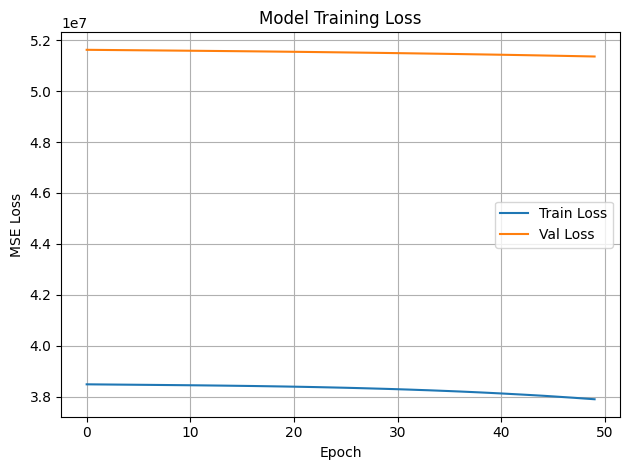

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Model Evaluation on Test Set:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Model Evaluation on Test Set:
Mean Squared Error (MSE): 17983945.538758464
Mean Absolute Error (MAE): 3375.6631460324506
R² Score: -1.2378879090798391
